In [1]:
!pip install scikit-learn
!pip install ucimlrepo
!pip install seaborn
!pip install prince
!pip install hdbscan
!pip install --upgrade typing_extensions
!pip install --upgrade kagglehub
!pip install kagglehub[pandas-datasets]
!pip install tensorflow

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
  Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
ERROR: tensorflow 2.13.1 has requirement typing-extensions<4.6.0,>=3.6.6, but you'll have typing-extensions 4.13.2 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have 

In [4]:
import hdbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#from prince import MCA


In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

X = df1 = pd.read_csv("./db/winequality-white.csv", sep=";")
X

In [41]:
Y = df2 = pd.read_csv("./db/winequality-red.csv", sep=";")
Y

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [110]:
db = pd.concat([X, Y], ignore_index=True).drop_duplicates()
db

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
6               6.2             0.320         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08             1.9      0.068   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
6491                 28.0                  38.0  0.99651  3.42       0.82   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
6         9.6        6  
...       ...      ...  
6491      9.5        6  
6492     10.5        5  
6493     11.2        6  
6495     10.2        5  
6496     11.0        6  

[5318 rows x 12 columns]

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

for i in range(2,20,1):
    kmeans = KMeans(n_clusters=i)
    kmeans_labels = kmeans.fit_predict(db)
    sil_score_kmeans = silhouette_score(db, kmeans_labels)
    print(f"iteration: {i}, score: {sil_score_kmeans}")

/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 2, score: 0.5091835220675636


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 3, score: 0.5036522116812165


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 4, score: 0.44987855016291634


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 5, score: 0.4169405099766919


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 6, score: 0.390172857724165


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 7, score: 0.36404852611958444


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 8, score: 0.3637721459571074


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 9, score: 0.34170596723452723


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 10, score: 0.3382051787378713


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 11, score: 0.3291978952183543


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 12, score: 0.33518654704195583


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 13, score: 0.3299292309840114


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 14, score: 0.32125160557279225


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 15, score: 0.3178727046558123


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 16, score: 0.3201900738869162


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 17, score: 0.32133219453362705


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 18, score: 0.3075376677629903


/home/hduser_/jupyter-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


iteration: 19, score: 0.3108746102572533


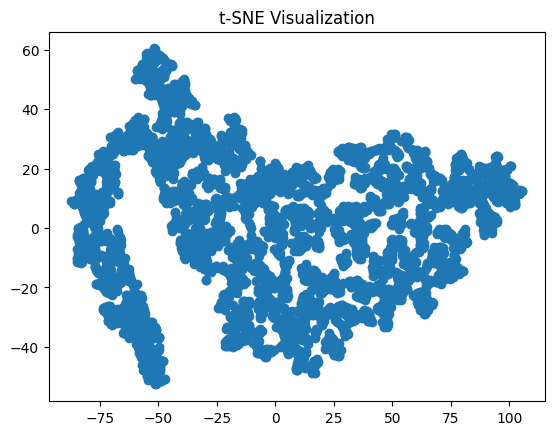

In [111]:
tsne = TSNE()
tsne_result = tsne.fit_transform(db) # shape: (n_samples, 2)

# Optionally, if you have labels
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
plt.title("t-SNE Visualization")
plt.show()



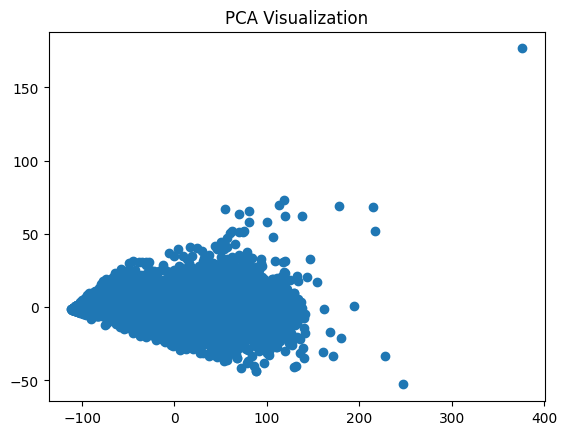

In [112]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(db)

# Optionally, if you have labels
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Visualization")
plt.show()


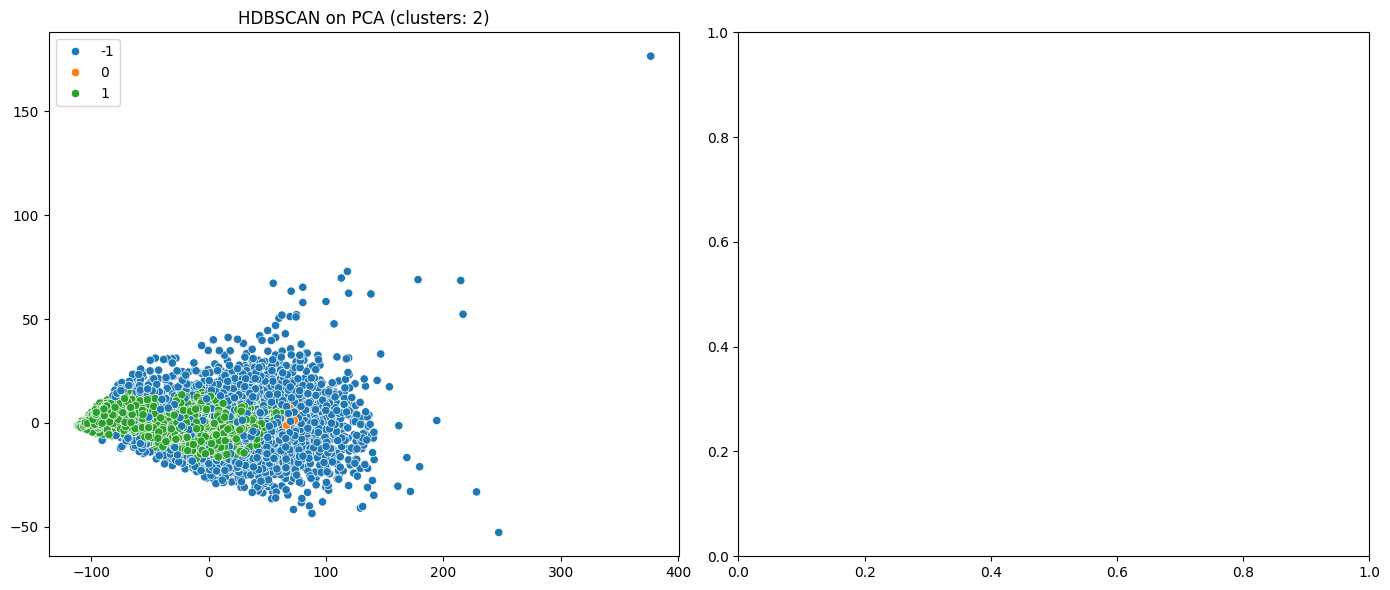

HDBSCAN Results:
  PCA: 2 clusters, silhouette: 0.38754316334775163


In [113]:
# --- HDBSCAN on PCA ---
hdb_pca = hdbscan.HDBSCAN(min_cluster_size=20)
labels_hdb_pca = hdb_pca.fit_predict(X_pca)

# Handle silhouette only if more than 1 cluster found
if len(set(labels_hdb_pca)) > 1:
    sil_hdb_pca = silhouette_score(X_pca[labels_hdb_pca != -1], labels_hdb_pca[labels_hdb_pca != -1])
else:
    sil_hdb_pca = None

# --- Plot HDBSCAN results ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_hdb_pca, palette="tab10", ax=axs[0])
axs[0].set_title(f"HDBSCAN on PCA (clusters: {len(set(labels_hdb_pca)) - (-1 in labels_hdb_pca)})")

plt.tight_layout()
plt.show()

# --- Print silhouette scores ---
print("HDBSCAN Results:")
print(f"  PCA: {len(set(labels_hdb_pca)) - (-1 in labels_hdb_pca)} clusters, silhouette: {sil_hdb_pca if sil_hdb_pca is not None else 'N/A'}")


In [114]:
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# X_tsne_scaled = X_tsne #StandardScaler().fit_transform(X_tsne)
dbscan = DBSCAN().fit(StandardScaler().fit_transform(df))
labels = dbscan.fit_predict(df)

if len(set(labels)) > 1:
    score = silhouette_score(df, labels)
    print("Silhouette Score:", score)
    print(f"number of labels: {len(labels)}")
else:
    print("DBSCAN found no clusters")

Silhouette Score: -0.5977278518896771
number of labels: 4898


In [61]:
# Plotting
def plot_3d(X_pca, labels, title, ax):
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Spectral', s=20)
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

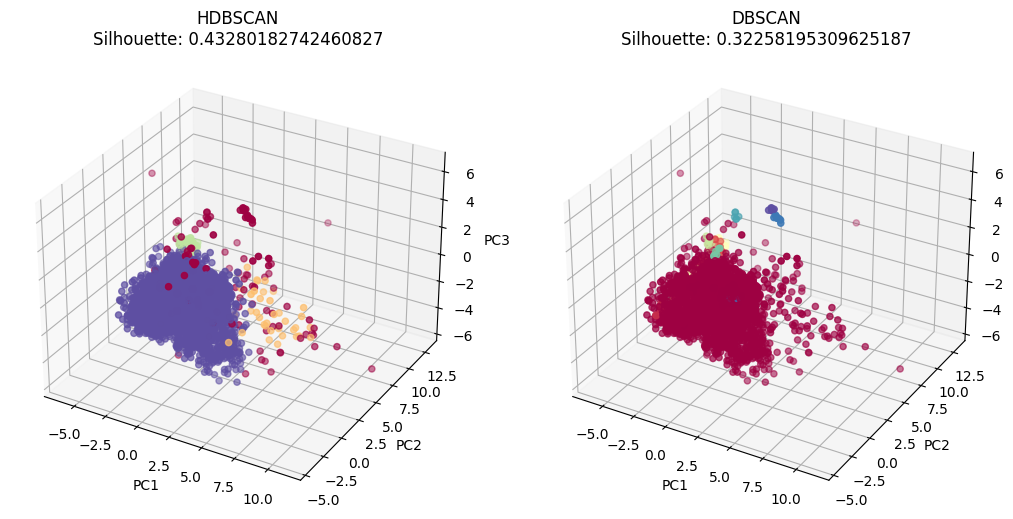

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
import hdbscan

# Assume X is your input data
# X = ...

# Step 1: Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(db)

# Step 2: PCA to 3D
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 3: HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=20)
hdb_labels = hdb.fit_predict(X_pca)

# Step 4: DBSCAN
dbs = DBSCAN(eps=0.8, min_samples=6)
db_labels = dbs.fit_predict(X_pca)

# Compute silhouette scores for HDBSCAN and DBSCAN (excluding noise points)
def sil_score_safe(X, labels, name):
    if len(set(labels)) > 1 and -1 in labels:
        mask = labels != -1
        return silhouette_score(X[mask], labels[mask])
    elif len(set(labels)) > 1:
        return silhouette_score(X, labels)
    else:
        return f"{name}: only one cluster"

hdb_score = sil_score_safe(X_pca, hdb_labels, "HDBSCAN")
db_score = sil_score_safe(X_pca, db_labels, "DBSCAN")

fig = plt.figure(figsize=(16, 10))

# HDBSCAN Plot
ax1 = fig.add_subplot(231, projection='3d')
plot_3d(X_pca, hdb_labels, f"HDBSCAN\nSilhouette: {hdb_score}", ax1)

# DBSCAN Plot
ax2 = fig.add_subplot(232, projection='3d')
plot_3d(X_pca, db_labels, f"DBSCAN\nSilhouette: {db_score}", ax2)

plt.tight_layout()
plt.show()



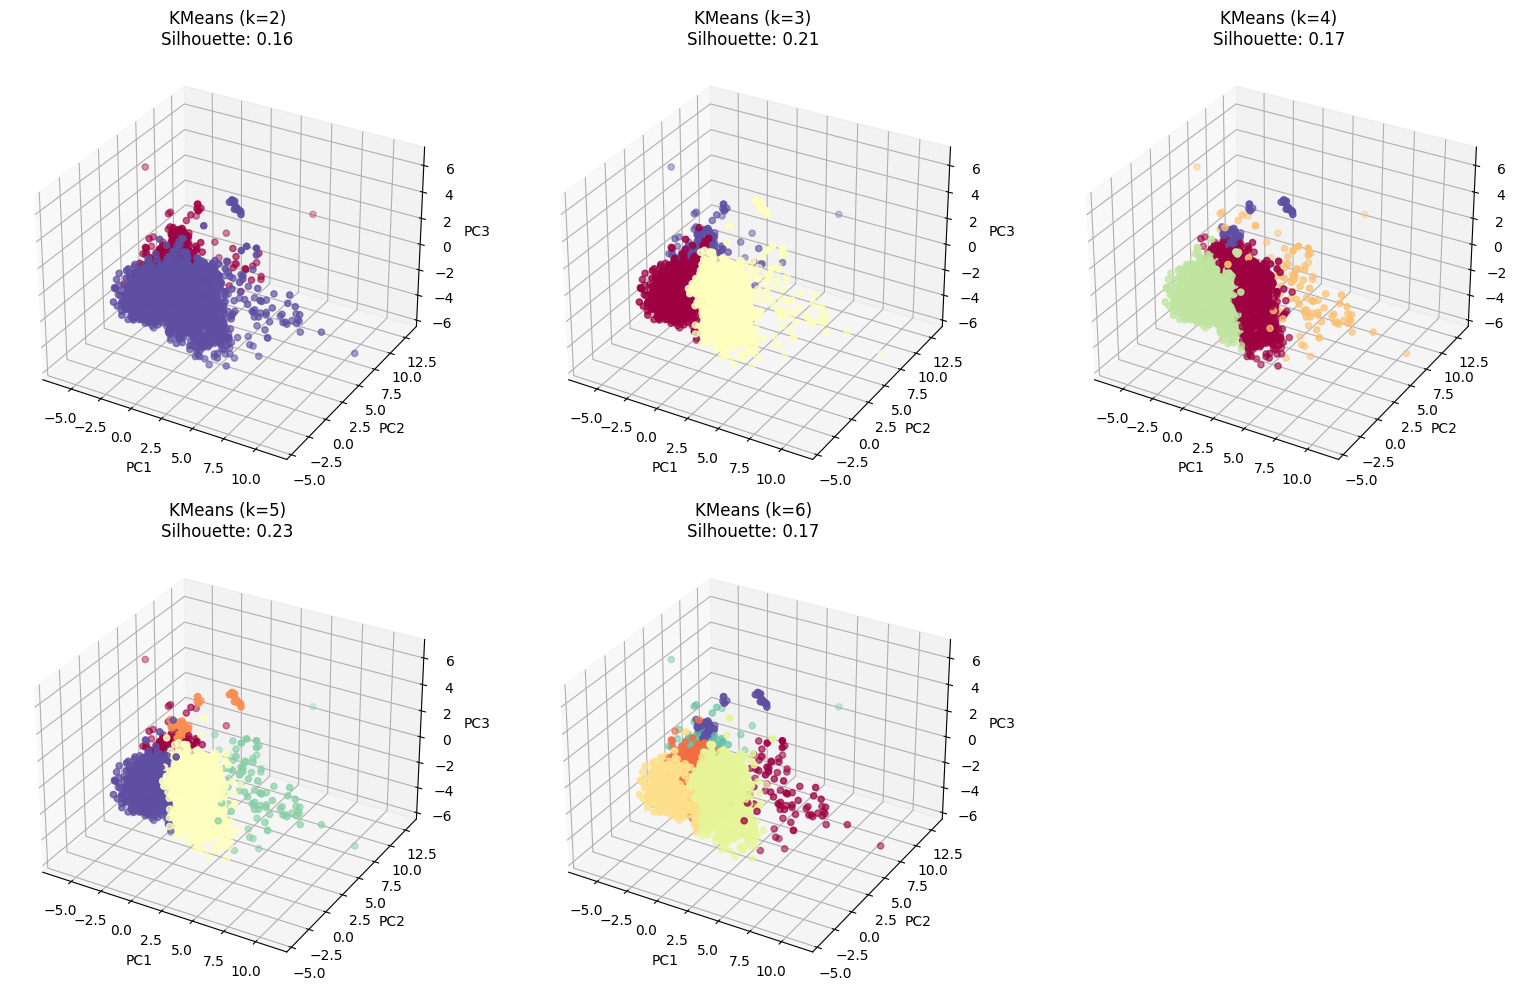

In [142]:
fig = plt.figure(figsize=(16, 10))

# Step 5: KMeans with different k values
k_values = [2, 3, 4, 5, 6]
kmeans_results = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    k_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, k_labels)
    kmeans_results.append((k, k_labels, score))

# KMeans Plots
for idx, (k, k_labels, score) in enumerate(kmeans_results):
    ax = fig.add_subplot(2, 3, idx + 1, projection='3d')
    plot_3d(X_pca, k_labels, f"KMeans (k={k})\nSilhouette: {score:.2f}", ax)

plt.tight_layout()
plt.show()


In [143]:
df_hdb = db
df_hdb["hdb_labels"] = hdb_labels

In [144]:
df_hdb

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
6               6.2             0.320         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
6491            6.8             0.620         0.08             1.9      0.068   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
6                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
6491                 28.0                  38.0  0.99651  3.42       0.82   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  db_labels  hdb_labels  
0         8.8        6         -1           2  
1         9.5        6         -1           2  
2        10.1        6         -1           2  
3         9.9        6         -1           2  
6         9.6        6         -1           2  
...       ...      ...        ...         ...  
6491      9.5        6         -1           2  
6492     10.5        5         -1           2  
6493     11.2        6         -1           2  
6495     10.2        5         -1           2  
6496     11.0        6         -1           2  

[5318 rows x 14 columns]

In [145]:
set(df_hdb["hdb_labels"])

{-1, 0, 1, 2}

In [148]:
df_db[df_db["db_labels"] == 0]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
748             6.9              0.18         0.38            8.10      0.049   
761             7.0              0.20         0.38            8.10      0.050   
825             7.0              0.21         0.37            7.20      0.042   
2782            7.1              0.20         0.31            6.85      0.053   
2783            7.1              0.20         0.31            7.40      0.053   
2982            7.0              0.20         0.31            8.00      0.050   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
748                  44.0                 176.0  0.99580  3.30       0.54   
761                  42.0                 173.0  0.99585  3.30       0.54   
825                  36.0                 167.0  0.99580  3.26       0.56   
2782                 32.0                 211.0  0.99587  3.31       0.59   
2783                 32.0                 211.0  0.99587  3.31       0.59   
2982                 29.0                 213.0  0.99596  3.28       0.57   

      alcohol  quality  db_labels  hdb_labels  
748       9.8        6          0           2  
761       9.8        6          0           2  
825       9.8        6          0           2  
2782     10.4        6          0           2  
2783     10.4        6          0           2  
2982     10.4        6          0           2

In [149]:
df_db[df_db["db_labels"] == 1]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1282            7.4              0.31         0.74            10.7      0.039   
1440            7.2              0.26         0.74            13.6      0.050   
1525            7.2              0.27         0.74            12.5      0.037   
1585            7.3              0.30         0.74            13.5      0.039   
2385            7.6              0.20         0.68            12.9      0.042   
2806            7.5              0.17         0.71            11.8      0.038   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1282                 51.0                 147.0  0.99770  3.02       0.43   
1440                 56.0                 162.0  0.99800  3.03       0.44   
1525                 47.0                 156.0  0.99810  3.04       0.44   
1585                 46.0                 165.0  0.99820  3.02       0.40   
2385                 56.0                 160.0  0.99841  3.05       0.41   
2806                 52.0                 148.0  0.99801  3.03       0.46   

      alcohol  quality  db_labels  hdb_labels  
1282      8.7        5          1           2  
1440      8.8        5          1           2  
1525      8.7        5          1           2  
1585      8.7        5          1           2  
2385      8.7        5          1           2  
2806      8.9        5          1           2

In [ ]:
df_db[df_db["db_labels"] == 10]


In [150]:
!pip install kagglehub

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 



{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [2]:
import pandas as pd

df = X
df

age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2                Divorced  Handlers-cleaners   Not-in-family   
3      Married-civ-spouse  Handlers-cleaners         Husband   
4      Married-civ-spouse     Prof-specialty            Wife   
...                   ...                ...             ...   
48837            Divorced     Prof-specialty   Not-in-family   
48838             Widowed                NaN  Other-relative   
48839  Married-civ-spouse     Prof-specialty         Husband   
48840            Divorced       Adm-clerical       Own-child   
48841  Married-civ-spouse    Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
0                   White    Male          2174             0              40   
1                   White    Male             0             0              13   
2                   White    Male             0             0              40   
3                   Black    Male             0             0              40   
4                   Black  Female             0             0              40   
...                   ...     ...           ...           ...             ...   
48837               White  Female             0             0              36   
48838               Black    Male             0             0              40   
48839               White    Male             0             0              50   
48840  Asian-Pac-Islander    Male          5455             0              40   
48841               White    Male             0             0              60   

      native-country  
0      United-States  
1      United-States  
2      United-States  
3      United-States  
4               Cuba  
...              ...  
48837  United-States  
48838  United-States  
48839  United-States  
48840  United-States  
48841  United-States  

[48842 rows x 14 columns]

In [3]:
df.count()

age               48842
workclass         47879
fnlwgt            48842
education         48842
education-num     48842
marital-status    48842
occupation        47876
relationship      48842
race              48842
sex               48842
capital-gain      48842
capital-loss      48842
hours-per-week    48842
native-country    48568
dtype: int64

In [179]:
df.drop(["type id uri track_href analysis_url song_name Unnamed: 0 title"])

KeyError: "['type id uri track_href analysis_url song_name Unnamed: 0 title'] not found in axis"

# ADULT

In [4]:
!pip install ucimlrepo

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [17]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Apply transformations
X_processed = preprocessor.fit_transform(X)
# Convert y to a NumPy array
y_array = y.values.ravel()

## PCA -> TSNE

In [48]:
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)


In [62]:
tsne = TSNE(n_components=2, random_state=50, perplexity=5)
X_tsne = tsne.fit_transform(X_pca)


In [63]:
# Cluster the data
kmeans = KMeans(n_clusters=30, random_state=92)
clusters = kmeans.fit_predict(X_tsne)


/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


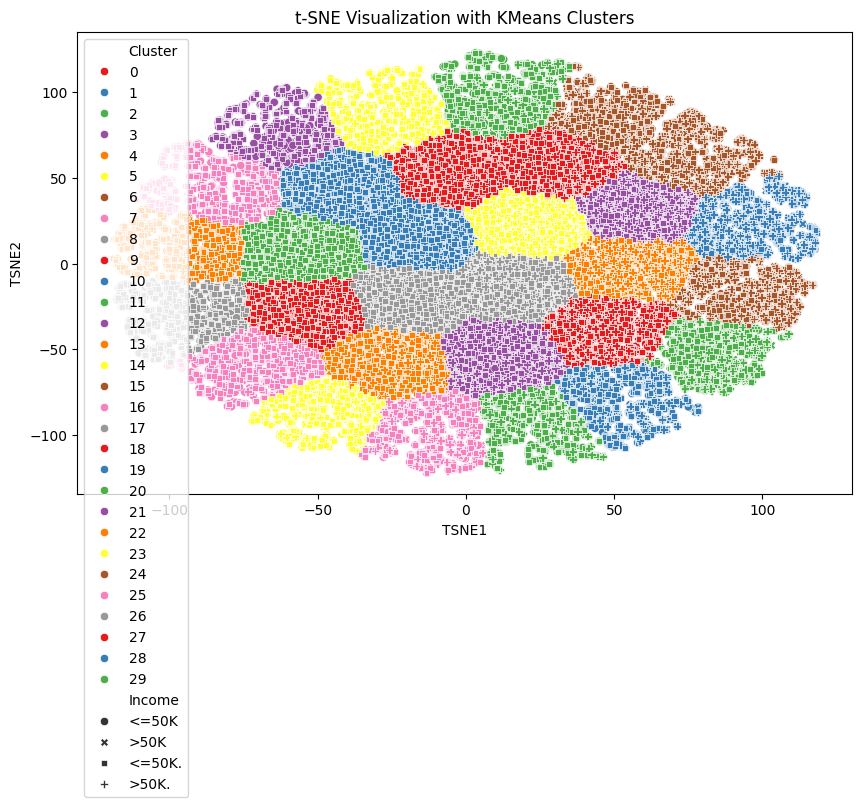

In [64]:
# Create a DataFrame for visualization
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = clusters
tsne_df['Income'] = y_array

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', style='Income', palette='Set1')
plt.title('t-SNE Visualization with KMeans Clusters')
plt.show()


## MCA -> TSNE

In [52]:
from prince import MCA

# Select categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X_categorical = X[categorical_cols]

# Apply MCA
mca = MCA(n_components=10, random_state=18)
X_mca = mca.fit_transform(X_categorical)

In [65]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=18, perplexity=5)
X_tsne = tsne.fit_transform(X_mca)

In [66]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import hdbscan

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_tsne)

# HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(X_tsne)

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_tsne)


/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
from sklearn.metrics import silhouette_score

# Silhouette scores
kmeans_score = silhouette_score(X_tsne, kmeans_labels)
dbscan_score = silhouette_score(X_tsne, dbscan_labels)
hdbscan_score = silhouette_score(X_tsne, hdbscan_labels)
gmm_score = silhouette_score(X_tsne, gmm_labels)

print(f"KMeans Silhouette Score: {kmeans_score}")
print(f"DBSCAN Silhouette Score: {dbscan_score}")
print(f"HDBSCAN Silhouette Score: {hdbscan_score}")
print(f"GMM Silhouette Score: {gmm_score}")


KMeans Silhouette Score: 0.3512081205844879
DBSCAN Silhouette Score: 0.6348481774330139
HDBSCAN Silhouette Score: 0.768282949924469
GMM Silhouette Score: 0.34534865617752075


/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

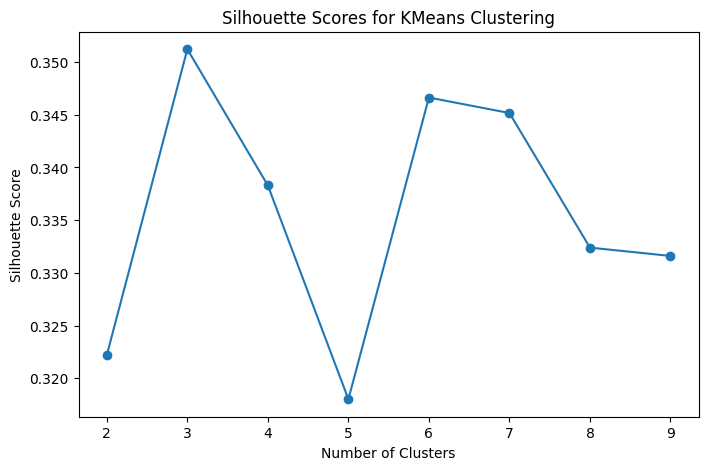

In [68]:
import matplotlib.pyplot as plt

silhouette_scores = []
cluster_range = range(2, 10)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_tsne)
    score = silhouette_score(X_tsne, labels)
    silhouette_scores.append(score)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


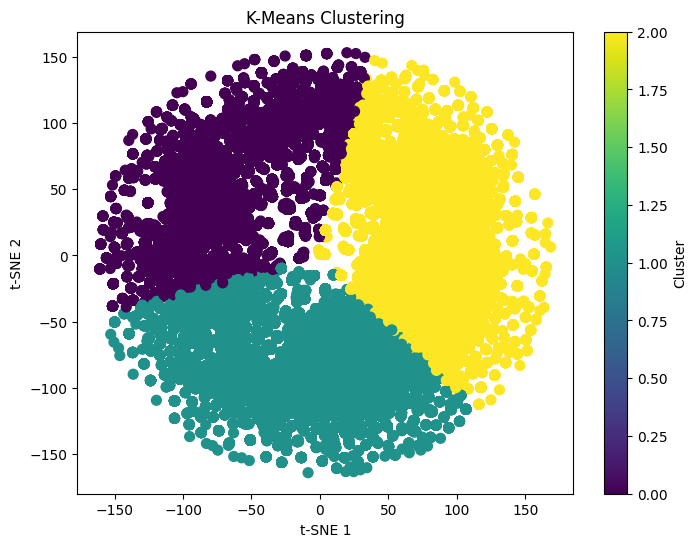

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()


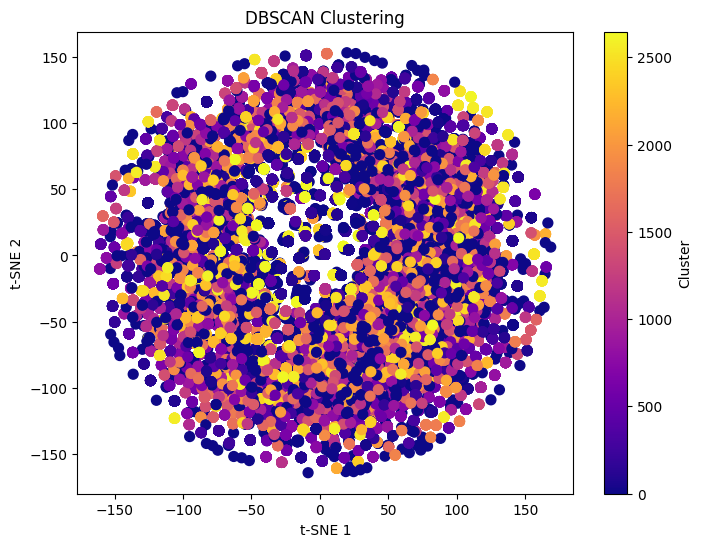

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()


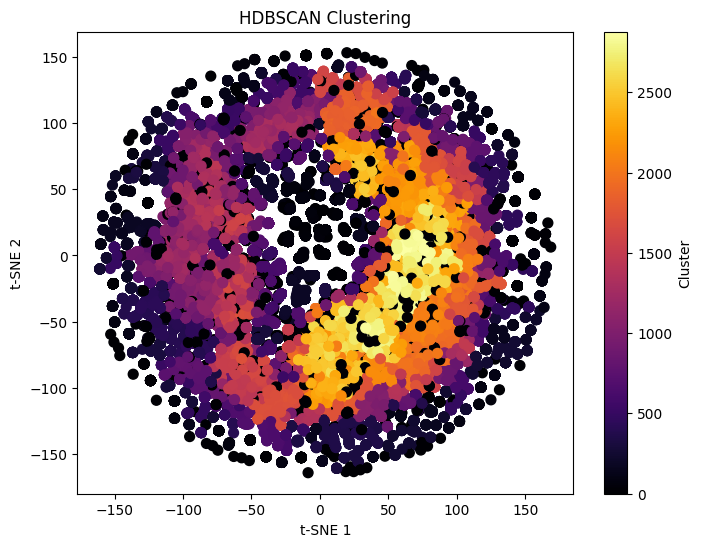

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hdbscan_labels, cmap='inferno', s=50)
plt.title('HDBSCAN Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()

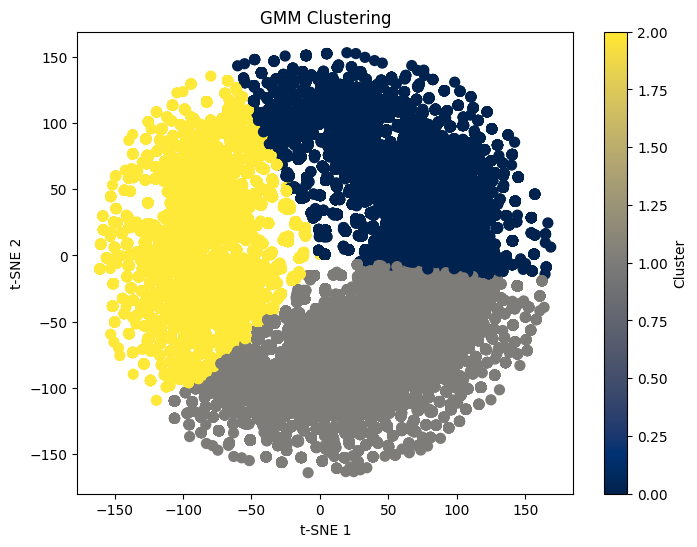

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, cmap='cividis', s=50)
plt.title('GMM Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()

In [73]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
kmeans_score = silhouette_score(X_tsne, kmeans_labels)
dbscan_score = silhouette_score(X_tsne, dbscan_labels)
hdbscan_score = silhouette_score(X_tsne, hdbscan_labels)
gmm_score = silhouette_score(X_tsne, gmm_labels)

# Display scores
print(f'K-Means Silhouette Score: {kmeans_score:.3f}')
print(f'DBSCAN Silhouette Score: {dbscan_score:.3f}')
print(f'HDBSCAN Silhouette Score: {hdbscan_score:.3f}')
print(f'GMM Silhouette Score: {gmm_score:.3f}')


K-Means Silhouette Score: 0.351
DBSCAN Silhouette Score: 0.635
HDBSCAN Silhouette Score: 0.768
GMM Silhouette Score: 0.345


## MCA -> ALGS

In [37]:
from prince import MCA

# Select categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X_categorical = X[categorical_cols]

# Apply MCA
mca = MCA(n_components=10, random_state=37)
X_mca = mca.fit_transform(X_categorical)

In [38]:
X_mca_to_plot = pca.fit_transform(X_mca)

### KMeans

/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

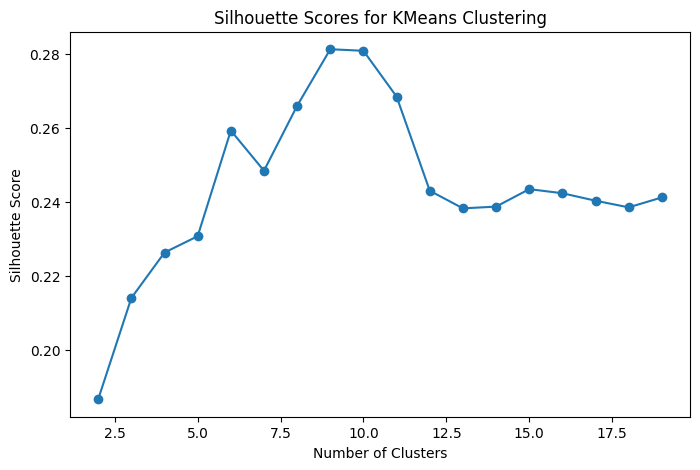

In [39]:
silhouette_scores = []
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=32)
    labels = kmeans.fit_predict(X_mca)
    score = silhouette_score(X_mca, labels)
    silhouette_scores.append(score)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [40]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_mca)

# HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(X_mca)

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_mca)


In [42]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
dbscan_score = silhouette_score(X_tsne, dbscan_labels)
hdbscan_score = silhouette_score(X_tsne, hdbscan_labels)
gmm_score = silhouette_score(X_tsne, gmm_labels)

# Display scores
print(f'K-Means Silhouette Score: {kmeans_score:.3f}')
print(f'DBSCAN Silhouette Score: {dbscan_score:.3f}')
print(f'HDBSCAN Silhouette Score: {hdbscan_score:.3f}')
print(f'GMM Silhouette Score: {gmm_score:.3f}')


K-Means Silhouette Score: 0.361
DBSCAN Silhouette Score: -0.690
HDBSCAN Silhouette Score: 0.441
GMM Silhouette Score: 0.140


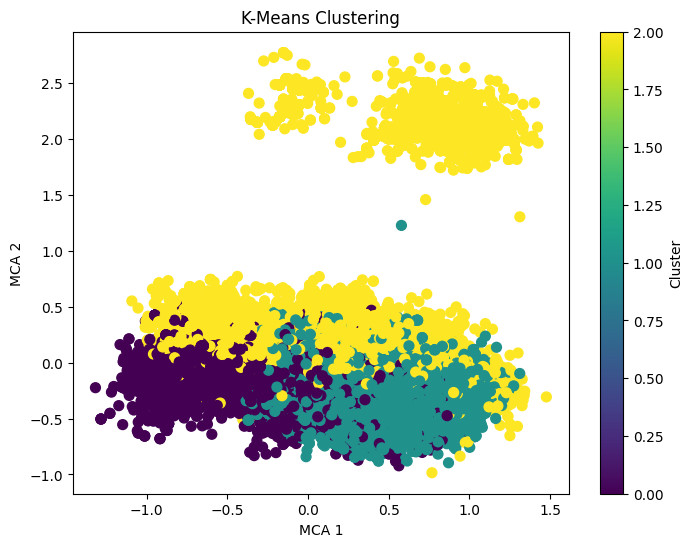

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(X_mca_to_plot[:, 0], X_mca_to_plot[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('MCA 1')
plt.ylabel('MCA 2')
plt.colorbar(label='Cluster')
plt.show()


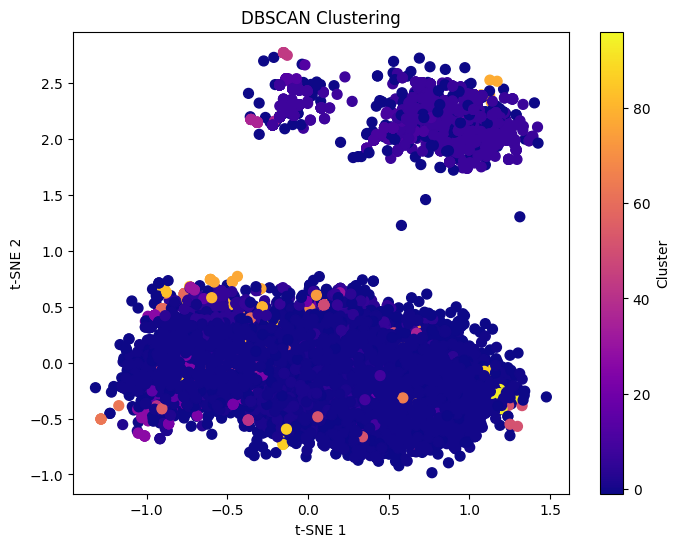

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(X_mca_to_plot[:, 0], X_mca_to_plot[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()

In [80]:


# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [81]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Combine features and target
data = pd.concat([X, y], axis=1)

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and target
X_clean = data.drop('income', axis=1)
y_clean = data['income']

# Identify categorical and numerical columns
categorical_cols = X_clean.select_dtypes(include=['object']).columns
numerical_cols = X_clean.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X_clean, columns=categorical_cols)

# Normalize numerical features
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])


In [82]:
# Sample 5,000 instances
X_sample = X_encoded.sample(n=5000, random_state=42)


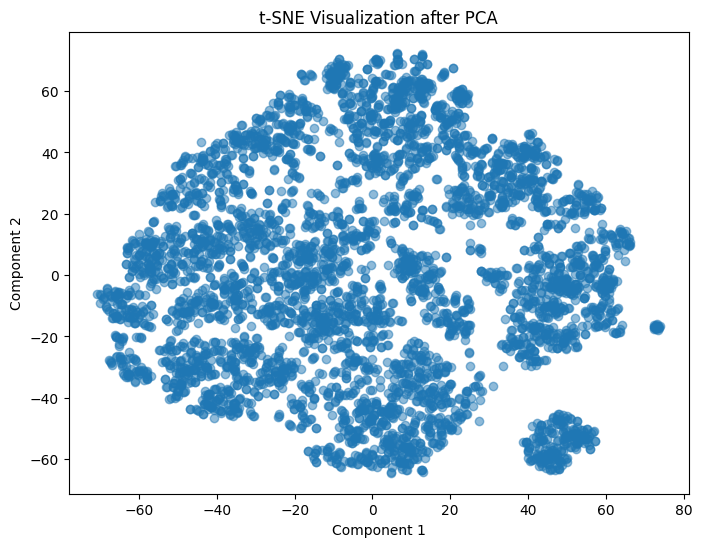

In [90]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply PCA to reduce to 50 dimensions
pca = PCA(n_components=50, random_state=31)
X_pca = pca.fit_transform(X_sample)

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=44, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_pca)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title('t-SNE Visualization after PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


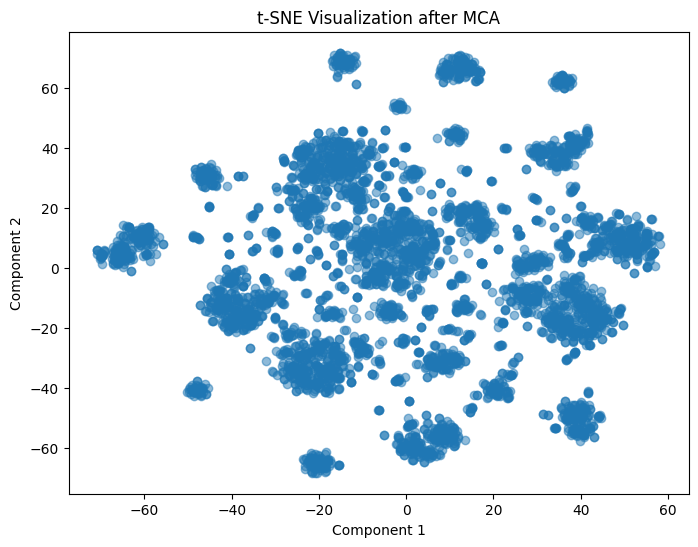

In [89]:
import prince

# Apply MCA
mca = prince.MCA(n_components=50, random_state=42)
X_mca = mca.fit_transform(X_sample)

# Apply t-SNE to reduce to 2 dimensions
tsne_mca = TSNE(n_components=2, random_state=14, perplexity=40)
X_tsne_mca = tsne_mca.fit_transform(X_mca)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_mca[:, 0], X_tsne_mca[:, 1], alpha=0.5)
plt.title('t-SNE Visualization after MCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

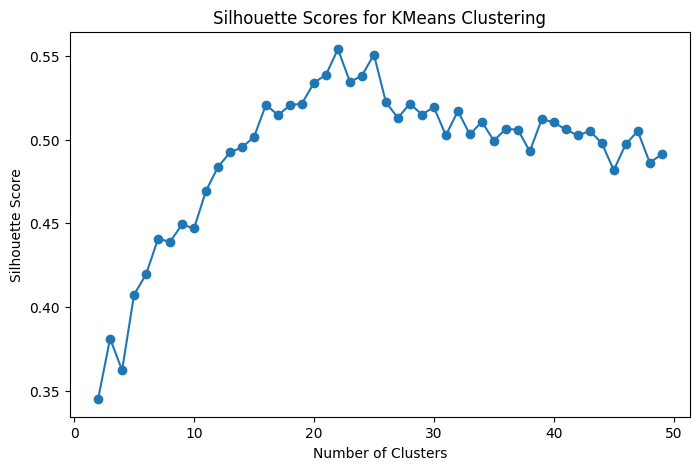

In [97]:
silhouette_scores = []
cluster_range = range(2, 50)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=32)
    labels = kmeans.fit_predict(X_tsne_mca)
    score = silhouette_score(X_tsne_mca, labels)
    silhouette_scores.append(score)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [98]:
# DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_mca)

# HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(X_tsne_mca)

# GMM
gmm = GaussianMixture(n_components=3, random_state=41)
gmm_labels = gmm.fit_predict(X_tsne_mca)


In [99]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
dbscan_score = silhouette_score(X_tsne_mca, dbscan_labels)
hdbscan_score = silhouette_score(X_tsne_mca, hdbscan_labels)
gmm_score = silhouette_score(X_tsne_mca, gmm_labels)

# Display scores
print(f'K-Means Silhouette Score: {kmeans_score:.3f}')
print(f'DBSCAN Silhouette Score: {dbscan_score:.3f}')
print(f'HDBSCAN Silhouette Score: {hdbscan_score:.3f}')
print(f'GMM Silhouette Score: {gmm_score:.3f}')


K-Means Silhouette Score: 0.351
DBSCAN Silhouette Score: -0.118
HDBSCAN Silhouette Score: 0.217
GMM Silhouette Score: 0.359


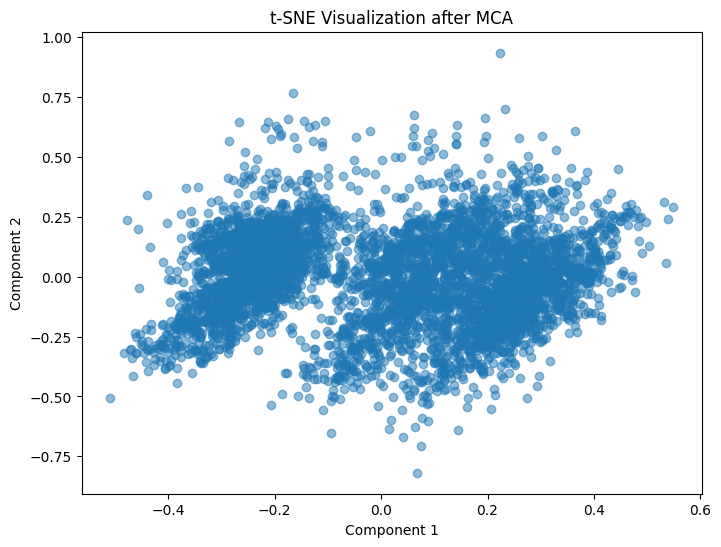

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(X_mca[0], X_mca[1], alpha=0.5)
plt.title('t-SNE Visualization after MCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Sampling

In [103]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
adult = fetch_ucirepo(id=2)

# Data as pandas DataFrames
X = adult.data.features
y = adult.data.targets


In [104]:
# Replace missing values represented by '?' with NaN
X.replace('?', pd.NA, inplace=True)

# Drop rows with missing values
X.dropna(inplace=True)

# Align target variable with cleaned features
y = y.loc[X.index]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])


/tmp/ipykernel_32491/597525668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', pd.NA, inplace=True)
/tmp/ipykernel_32491/597525668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [106]:
data_combined = X_encoded.copy()
data_combined['income'] = y

data_sample = data_combined.sample(n=10000, random_state=18) # Sampling

# Separate features and target
X_sample = data_sample.drop('income', axis=1)
y_sample = data_sample['income']


# PCA, MCA

In [107]:
from sklearn.decomposition import PCA
import prince

# PCA for numerical data
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_sample)

# MCA for categorical data
X_categorical = X.loc[X_sample.index, categorical_cols]
mca = prince.MCA(n_components=50, random_state=29)
X_mca = mca.fit_transform(X_categorical)


# TSNE

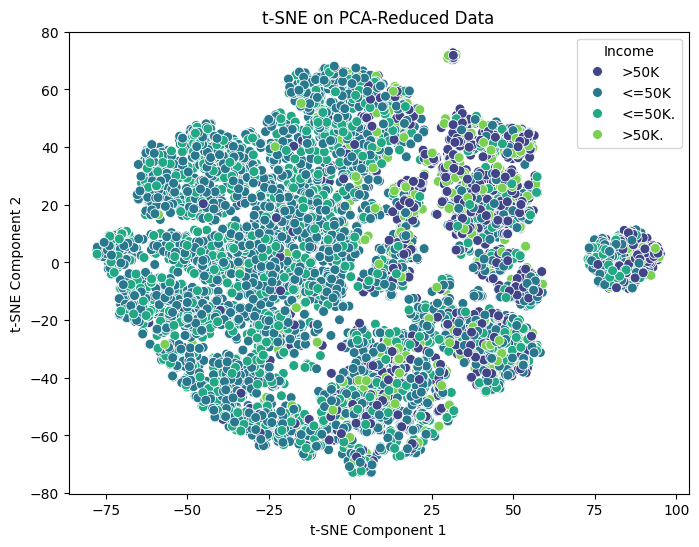

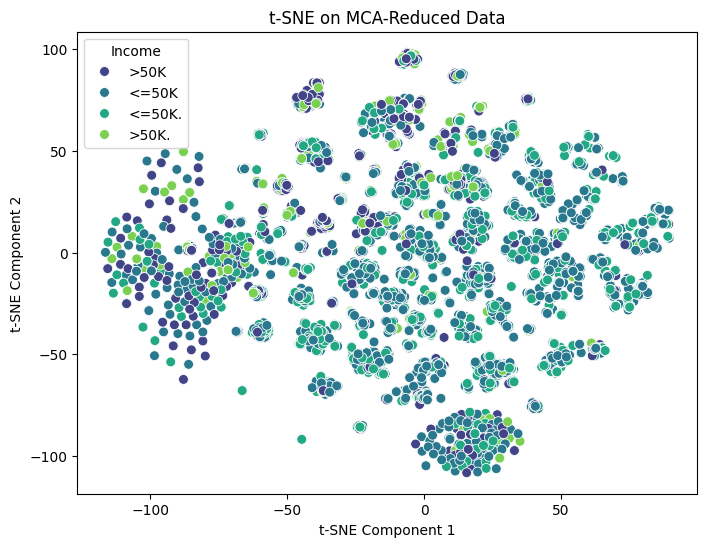

In [111]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne_pca = TSNE(n_components=2, random_state=53, perplexity=50)
X_tsne_pca = tsne_pca.fit_transform(X_pca)

X_tsne_mca = tsne_mca.fit_transform(X_mca)

def plot_tsne(X_tsne, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_sample, palette='viridis', s=50)
    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Income')
    plt.show()

# Visualizations
plot_tsne(X_tsne_pca, 't-SNE on PCA-Reduced Data')
plot_tsne(X_tsne_mca, 't-SNE on MCA-Reduced Data')


# Compute Over Combined DB

In [112]:
import numpy as np

# Combine PCA and MCA components
X_combined = np.hstack((X_pca, X_mca))


## KMeans

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_kmeans = None
best_silhouette = -1
best_i = -1

for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, random_state=68)
    kmeans_labels = kmeans.fit_predict(X_combined)
    score = silhouette_score(X_combined, kmeans_labels)
    if score > best_silhouette:
        best_silhouette = score
        best_kmeans = kmeans_labels
        best_i = i

print(f"{best_i} has the best K-Means Silhouette Score: {best_silhouette:.2f}")


/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/hduser_/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

3 has the best K-Means Silhouette Score: 0.10


## GMM

In [150]:
from sklearn.mixture import GaussianMixture

best_gmm = None
best_silhouette = -1
best_i = -1

for i in range(2, 30):
    gmm = GaussianMixture(n_components=i, random_state=68)
    gmm_labels = gmm.fit_predict(X_combined)
    score = silhouette_score(X_combined, kmeans_labels)
    if score > best_silhouette:
        best_silhouette = score
        best_gmm = gmm_labels
        best_i = i

print(f"{best_i} has the best GMM Silhouette Score: {best_silhouette:.2f}")

2 has the best GMM Silhouette Score: 0.07


## DBSCAN

In [133]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_combined)

dbscan_silhouette = silhouette_score(X_combined, dbscan_labels)
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")


DBSCAN Silhouette Score: -0.24


## HDBSCAN

In [134]:
import hdbscan

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan_model.fit_predict(X_combined)

hdbscan_silhouette = silhouette_score(X_combined, hdbscan_labels)
print(f"HDBSCAN Silhouette Score: {hdbscan_silhouette:.2f}")


HDBSCAN Silhouette Score: -0.07


## PLOT

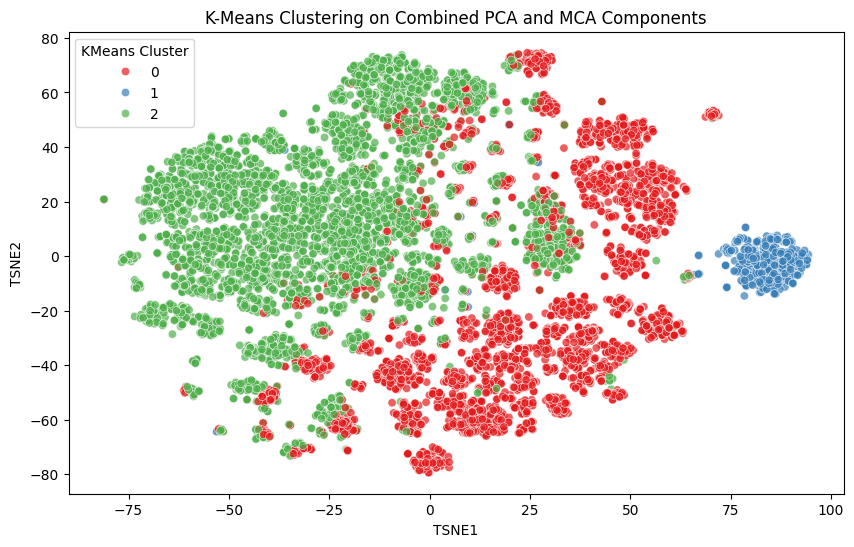

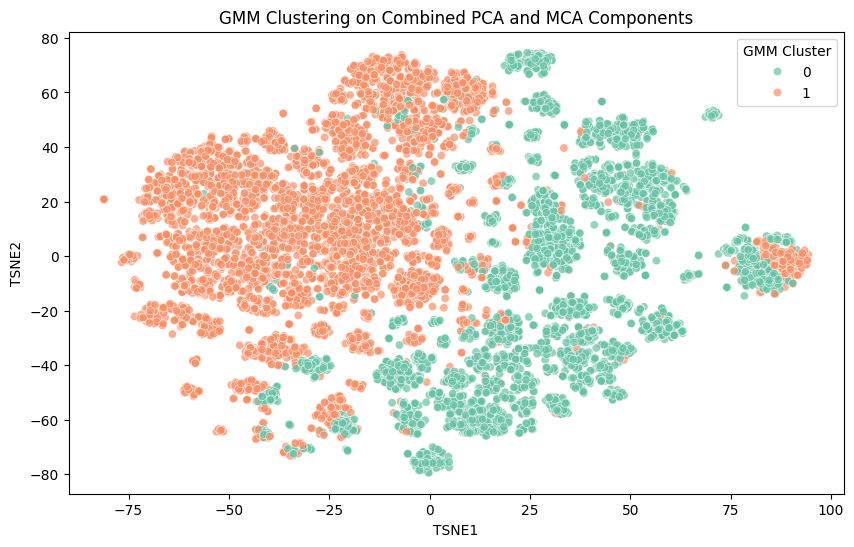

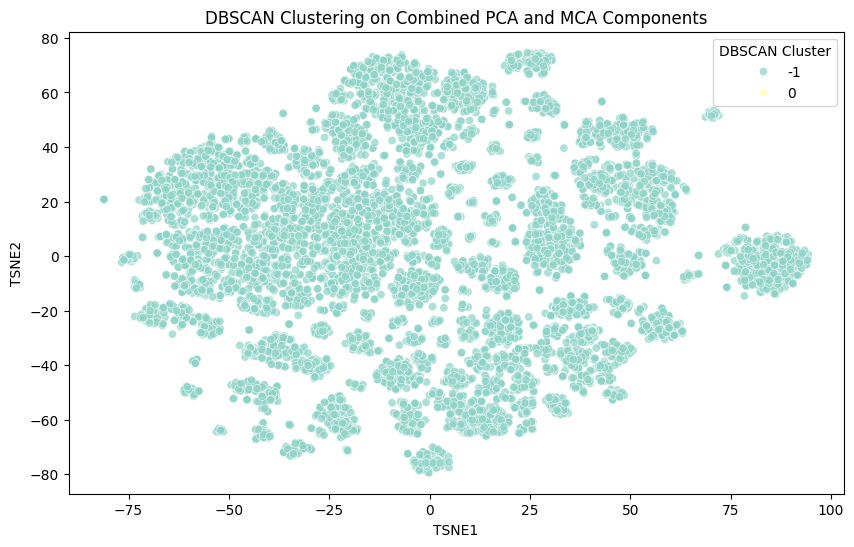

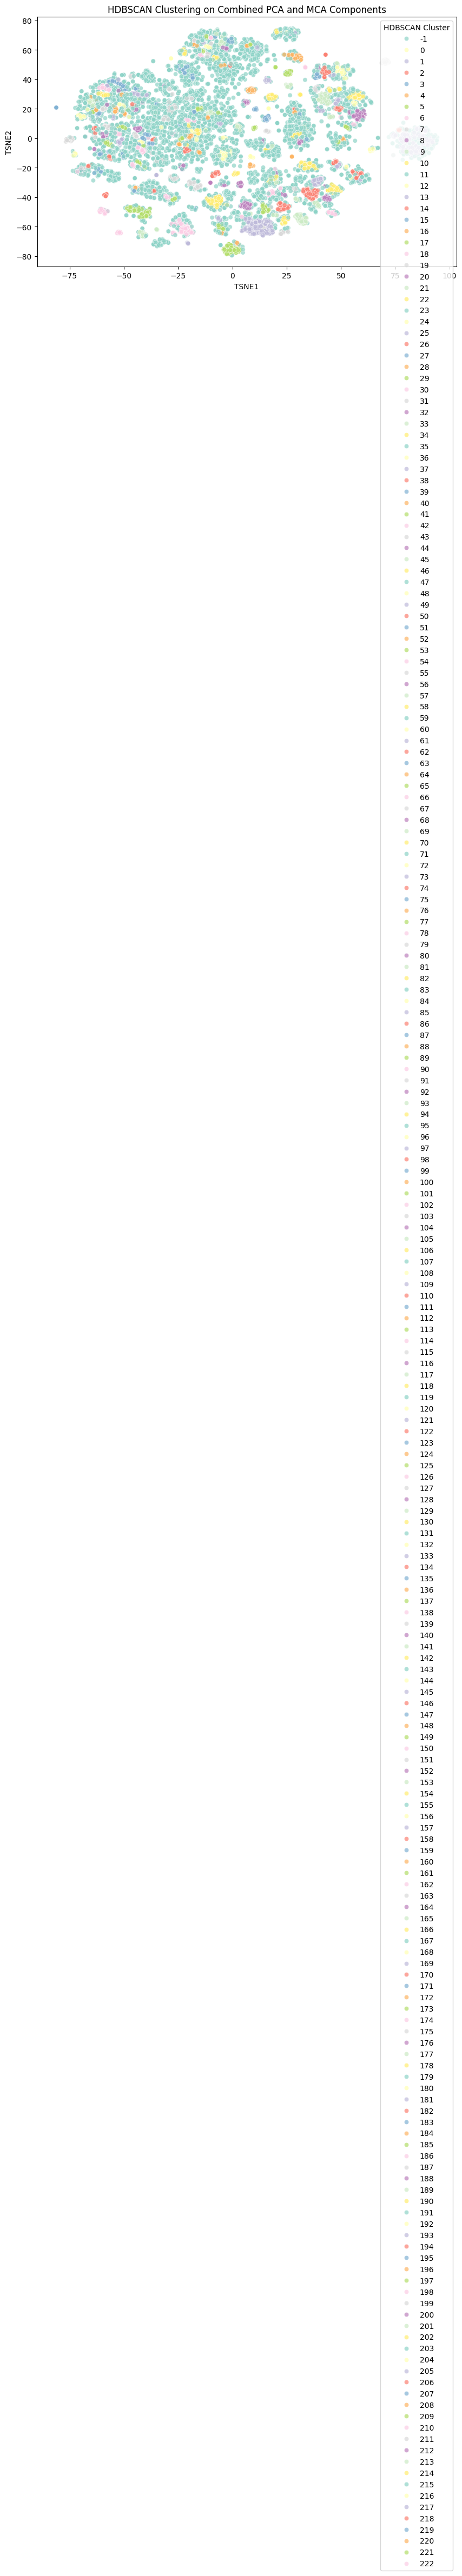

In [151]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=17, perplexity=50)
tsne_results = tsne.fit_transform(X_combined)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['KMeans Cluster'] = best_kmeans
tsne_df['GMM Cluster'] = best_gmm
tsne_df['DBSCAN Cluster'] = dbscan_labels
tsne_df['HDBSCAN Cluster'] = hdbscan_labels

# Plot K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='KMeans Cluster', palette='Set1', alpha=0.7)
plt.title('K-Means Clustering on Combined PCA and MCA Components')
plt.show()

# Plot GMM clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='GMM Cluster', palette='Set2', alpha=0.7)
plt.title('GMM Clustering on Combined PCA and MCA Components')
plt.show()

# Plot DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='DBSCAN Cluster', palette='Set3', alpha=0.7)
plt.title('DBSCAN Clustering on Combined PCA and MCA Components')
plt.show()

# Plot HDBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='HDBSCAN Cluster', palette='Set3', alpha=0.7)
plt.title('HDBSCAN Clustering on Combined PCA and MCA Components')
plt.show()


In [57]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

kmeans_davies_bouldin = davies_bouldin_score(X_combined, best_kmeans)
kmeans_calinski_harabasz = calinski_harabasz_score(X_combined, best_kmeans)

gmm_calinski_harabasz = calinski_harabasz_score(X_combined, gmm_labels)

dbscan_davies_bouldin = davies_bouldin_score(X_combined, dbscan_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(X_combined, dbscan_labels)

print(f"K-Means Davies-Bouldin Index: {kmeans_davies_bouldin:.2f}")
print(f"K-Means Calinski-Harabasz Index: {kmeans_calinski_harabasz:.2f}")
print(f"GMM Davies-Bouldin Index: {gmm_davies_bouldin:.2f}")
print(f"GMM Calinski-Harabasz Index: {gmm_calinski_harabasz:.2f}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin:.2f}")
print(f"DBSCAN Calinski-Harabasz Index: {dbscan_calinski_harabasz:.2f}")


NameError: name 'X_combined' is not defined

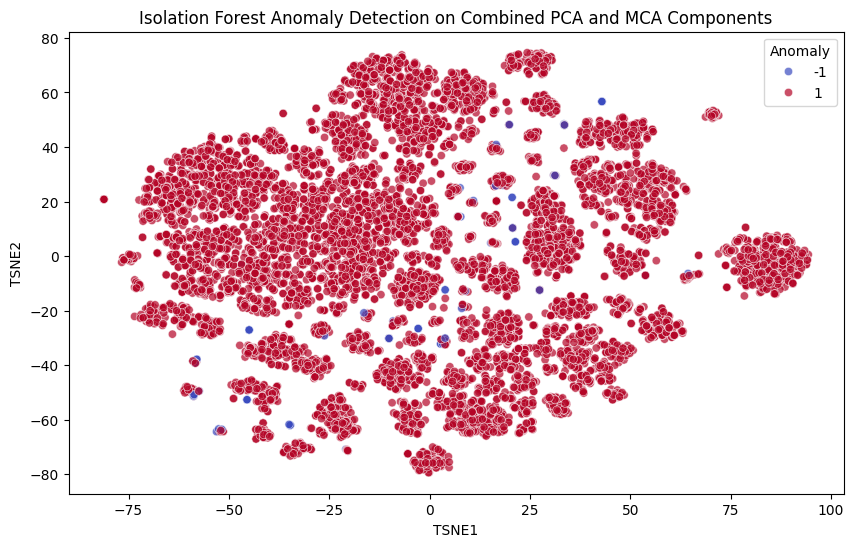

In [146]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=29)
iso_labels = iso_forest.fit_predict(X_combined)

# Add anomaly labels to t-SNE DataFrame
tsne_df['Anomaly'] = iso_labels

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Anomaly', palette='coolwarm', alpha=0.7)
plt.title('Isolation Forest Anomaly Detection on Combined PCA and MCA Components')
plt.show()


In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /home/hduser_/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2


In [11]:
import shutil
from pathlib import Path
IMAGE_DIR = "raw-img"
source_raw_img_path = Path(path) / IMAGE_DIR

destination_path = Path.cwd() / IMAGE_DIR

shutil.move(str(source_raw_img_path), str(destination_path))

print(f"'raw-img' directory has been moved to: {destination_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/home/hduser_/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img'

In [26]:
raw_img_path = './raw-img'


img_size = (224, 224)


In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tqdm import tqdm

In [40]:
import tensorflow as tf

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './raw-img',
    image_size=(224, 224),
    batch_size=32,
    label_mode='int',
    shuffle=True,
    validation_split=0.8,
    subset='training',
    seed=123
)


Found 26179 files belonging to 10 classes.
Using 5236 files for training.


In [41]:
import numpy as np

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Create a new model with the base model and a Global Average Pooling layer
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D()
])

# Extract features
features = []
labels = []

for img_batch, label_batch in dataset:
    feature_batch = model(img_batch)
    features.append(feature_batch)
    labels.append(label_batch)

features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)


2025-04-19 19:48:35.764624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-04-19 19:49:07.793355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-04-19 19:49:32.089133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-04-19 19:49:59.985862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2025-04-19 19:50:07.377116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [42]:
from sklearn.preprocessing import LabelEncoder
# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [43]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=33, perplexity=50)

# Fit and transform the features
features_tsne = tsne.fit_transform(features)



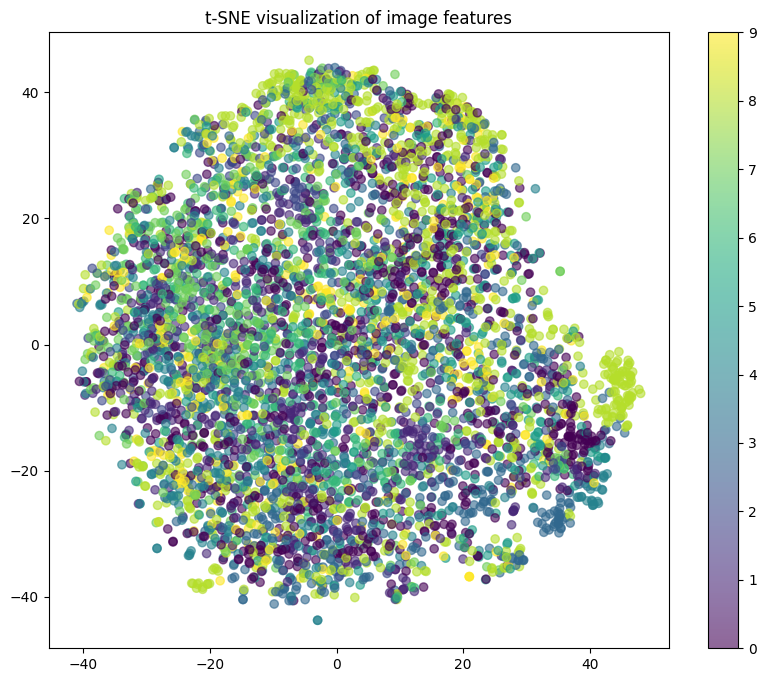

In [44]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=labels_encoded, cmap='viridis', alpha=0.6)
plt.colorbar()
plt.title('t-SNE visualization of image features')
plt.show()


In [45]:
from sklearn.decomposition import PCA

# Reduce dimensionality with PCA
pca = PCA(n_components=30, random_state=43)
features_pca = pca.fit_transform(features)


In [46]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=123, perplexity=50)
features_tsne_pca = tsne.fit_transform(features_pca)


In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(features_tsne_pca[:, 0], features_tsne_pca[:, 1], c=labels_encoded, cmap='viridis', alpha=0.6)
plt.colorbar()
plt.title('t-SNE visualization of image features')
plt.show()

In [48]:
!pip install kagglehub scikit-learn matplotlib seabor

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point


In [50]:
import kagglehub
import shutil
import os

# Download the dataset
path = kagglehub.dataset_download("karnikakapoor/digits")

# Move the dataset to current directory (`./`)
new_path = './digits'
if not os.path.exists(new_path):
    os.makedirs(new_path)

# Move all files from the downloaded path to the new path
shutil.move(path, new_path)

print(f"Dataset moved to: {new_path}")


100%|██████████████████████████████████████| 33.2M/33.2M [00:02<00:00, 15.3MB/s]

Extracting model files...


Dataset moved to: ./digits


In [56]:
import os
from PIL import Image
import numpy as np

def preprocess_images(dataset_dir, img_size=(32, 32)):
    x = []
    y = []
    for digit in sorted(os.listdir(dataset_dir)):
        digit_path = os.path.join(dataset_dir, digit)
        if not os.path.isdir(digit_path):  # Ensure it's a directory
            continue
        for img_name in os.listdir(digit_path):
            img_path = os.path.join(digit_path, img_name)
            if os.path.isdir(img_path):  # Skip directories
                continue
            try:
                img = Image.open(img_path).convert("L")  # Convert to grayscale
                img = img.resize(img_size)  # Resize to 32x32
                img_array = np.array(img).flatten()  # Flatten to 1024
                img_array = img_array / 255.0  # Normalize to [0, 1]
                x.append(img_array)
                y.append(int(digit))
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    return np.array(x), np.array(y)

# Example usage
dataset_dir = './digits'  # Replace with your dataset path
X, y = preprocess_images(dataset_dir)
print(f"Processed {len(X)} images.")


Processed 0 images.
